In [129]:
from fpdf import FPDF
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.figure_factory as pff
import plotly.subplots as sp

In [93]:
df = pandas.read_csv('../data_clean/StudentsPerformance.csv', index_col=0)
df.info()
df_gender_scores=df[["gender", "math_score", "reading_score", "writing_score"]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_or_ethnicity            1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


In [85]:
# Gender Distribution given in the data set
gender_percent=px.pie(values=df.gender.value_counts(), names=df.gender.unique(), title="Gender")
gender_percent.update_traces(textposition='inside', textinfo='percent+label')
# race ethnicity distribution given in the data set
race_ethnicity_percent=px.pie(values=df['race_or_ethnicity'].value_counts(), names=df['race_or_ethnicity'].unique(), title="race/ethnicity")
race_ethnicity_percent.update_traces(textposition='inside', textinfo='percent+label')
#parents education level distribution in the given data set
parents_education_percent=px.pie(values=df['parental_level_of_education'].value_counts(), names=df['parental_level_of_education'].unique(), title="Parents Education Level")
parents_education_percent.update_traces(textposition='inside', textinfo='percent+label')
lunch_type_percent=px.pie(values=df['lunch'].value_counts(), names=df['lunch'].unique(), title="lunch")
lunch_type_percent.update_traces(textposition='inside', textinfo='percent+label')
figures = [
            gender_percent,
            race_ethnicity_percent,
    parents_education_percent,
    lunch_type_percent
    
    ]

fig = sp.make_subplots(rows=1, cols=len(figures), specs=[[{"type": "domain"},{"type": "domain"}, {"type": "domain"},{"type": "domain"}]]) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.show()

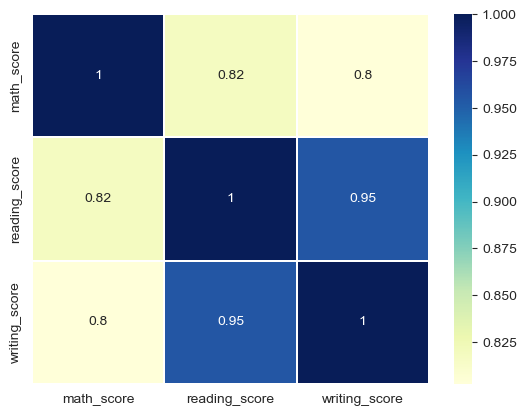

In [95]:
fig = sns.heatmap(df.corr(), cmap="YlGnBu", linewidths = 0.30, annot = True)

<AxesSubplot:xlabel='parental_level_of_education', ylabel='overall_score'>

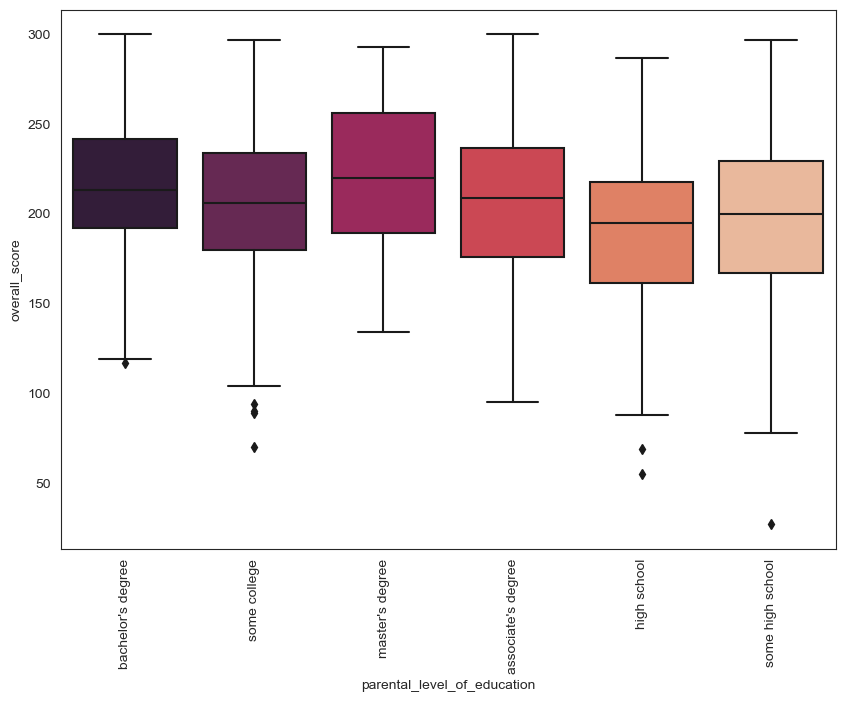

In [108]:
fig=plt.figure(figsize=(10,7))
df['overall_score']=df['math_score']+df['reading_score']+df['writing_score']
plt.xticks(rotation=90)
sns.boxplot(data=df,y='overall_score',x='parental_level_of_education',palette='rocket')

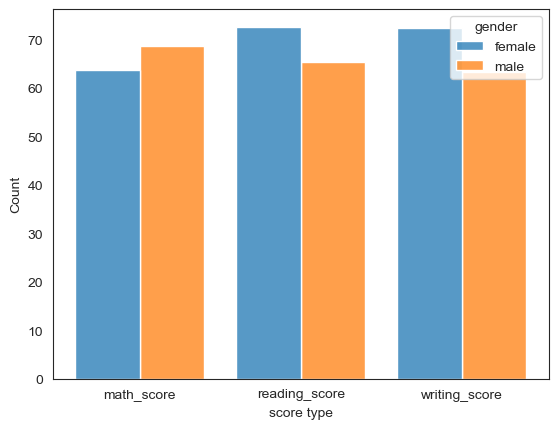

In [123]:
dfm = df_gender_scores.melt(id_vars='gender',var_name ='score type', value_name ='mean score')
df_mean = dfm.groupby(['gender', 'score type']).mean()
ax = sns.histplot(data=df_mean, x='score type', weights='mean score', hue='gender',multiple="dodge", shrink=.8)
plt.savefig('../results/charts_png/gender_vs_scores.png')

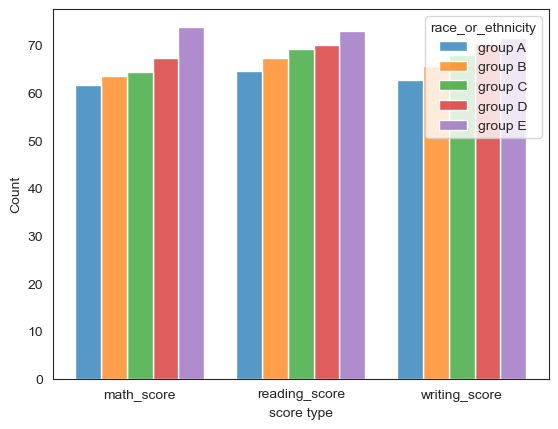

In [125]:
df_race_score=df[["race_or_ethnicity", "math_score", "reading_score", "writing_score"]]
dfm = df_race_score.melt(id_vars='race_or_ethnicity',var_name ='score type', value_name ='mean score')
df_mean = dfm.groupby(['race_or_ethnicity', 'score type']).mean()
ax = sns.histplot(data=df_mean, x='score type', weights='mean score', hue='race_or_ethnicity',multiple="dodge", shrink=.8)
plt.savefig('../results/charts_png/race_ethnicity_vs_scores.png')

In [126]:
fig = px.histogram(data_frame = df,
             x = "parental_level_of_education",
             color="lunch", title="<b>Analysis of parent education level with lunch</b>",
             )

fig.show()

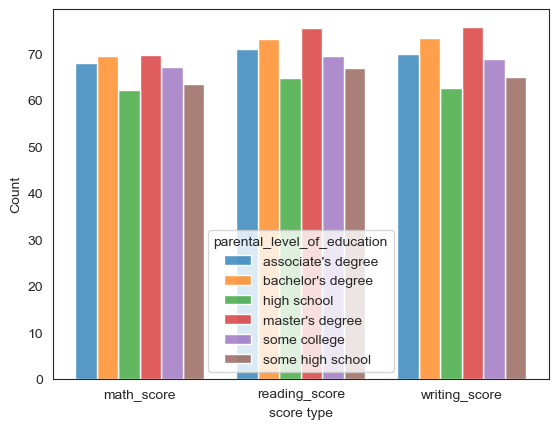

In [127]:
df_parent_score=df[["parental_level_of_education", "math_score", "reading_score", "writing_score"]]
dfm = df_parent_score.melt(id_vars='parental_level_of_education',var_name ='score type', value_name ='mean score')
df_mean = dfm.groupby(['parental_level_of_education', 'score type']).mean()
ax = sns.histplot(data=df_mean, x='score type', weights='mean score', hue='parental_level_of_education',multiple="dodge", shrink=.8)
plt.savefig('../results/charts_png/race_ethnicity_vs_scores.png')

In [128]:
dfs=df[["gender","test_preparation_course", "math_score", "reading_score", "writing_score"]]
fig = px.scatter(dfs, x="math_score", y="test_preparation_course",
                 title="Math score with respective to test preparation",
                 labels={"salary":"Annual Salary (in thousands)"}
                )
fig.show()

''